## Analyze A/B Test Results

You may either submit your notebook through the workspace here, or you may work from your local machine and submit through the next page.  Either way assure that your code passes the project [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).  **Please save regularly

This project will assure you have mastered the subjects covered in the statistics lessons.  The hope is to have this project be as comprehensive of these topics as possible.  Good luck!

## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  It is important that you get some practice working with the difficulties of these 

For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

**As you work through this notebook, follow along in the classroom and answer the corresponding quiz questions associated with each question.** The labels for each classroom concept are provided for each question.  This will assure you are on the right track as you work through the project, and you can feel more confident in your final submission meeting the criteria.  As a final check, assure you meet all the criteria on the [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).

<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [2]:
#import our libraries
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

a. Read in the dataset and take a look at the top few rows here:

In [3]:
#loading our dataframe using pandas
df = pd.read_csv('ab_data.csv')
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


b. Use the below cell to find the number of rows in the dataset.

In [4]:
#the number of rowa in  the dataset
df.shape[0]

294478

c. The number of unique users in the dataset.

In [5]:
#the number of unique user in the dataset
df['user_id'].nunique()

290584

d. The proportion of users converted.

In [6]:
#proportion of converted user
converted = df.query('converted == "1"')['converted'].count()
total_conv = df['converted'].count()
print(converted, total_conv)
print(converted / total_conv)

35237 294478
0.119659193556


e. The number of times the `new_page` and `treatment` don't line up.

In [7]:
#the number of times there is misplaced data therefore looking for where landing page = newpage and group = control
misplaced = df.query('landing_page == "new_page" & group =="control"')
misplaced.count()

user_id         1928
timestamp       1928
group           1928
landing_page    1928
converted       1928
dtype: int64

f. Do any of the rows have missing values?

In [8]:
#we use the info function to check for missing values of a dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294478 entries, 0 to 294477
Data columns (total 5 columns):
user_id         294478 non-null int64
timestamp       294478 non-null object
group           294478 non-null object
landing_page    294478 non-null object
converted       294478 non-null int64
dtypes: int64(2), object(3)
memory usage: 11.2+ MB


`2.` For the rows where **treatment** is not aligned with **new_page** or **control** is not aligned with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to provide how we should handle these rows.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [9]:
#we use the drop function to drop all misplaced data  
df.drop(df.query('landing_page == "new_page" & group =="control"').index , inplace =True)
df.drop(df.query('landing_page == "old_page" & group =="treatment"').index, inplace = True)

In [10]:
#created a new dataframe
df2 = df

In [11]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_id**s are in **df2**?

In [12]:
# we use the nunique to check the number of unique users
df2['user_id'].nunique()

290584

b. There is one **user_id** repeated in **df2**.  What is it?

In [13]:
# the duplicated fuction is used to check for duplicate
df2[df2.duplicated('user_id')]

,user_id,timestamp,group,landing_page,converted
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


c. What is the row information for the repeat **user_id**? 

In [14]:
#you can search through for users who has a particular used id 
df2[df2['user_id']==773192]

,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [15]:
#we use the drop function to drop one of the row
df2.drop(labels=1899, axis=0, inplace=True)

`4.` Use **df2** in the below cells to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [16]:
#calculating the probability where converted = 1 and divide by the total converted
individual_conv = df2.query('converted == "1"')['converted'].count()
total_conv2= df2['converted'].count()
print(individual_conv,total_conv2)
print(individual_conv/total_conv2)

34753 290584
0.119597087245


b. Given that an individual was in the `control` group, what is the probability they converted?

In [17]:
#the number of converted = 1 in the control group divided by the total 
ctrl_grp = df2.query('converted == "1" & group =="control"')['converted'].count()
total_ctrl = df2.query('group == "control"')['converted'].count()
print(ctrl_grp/total_ctrl)

0.1203863045


c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [18]:
#the number of converted = 1 in the treatment group divided by the total
trt_grp = df2.query('converted == "1" & group =="treatment"')['converted'].count()
total_trt = df2.query('group == "treatment"')['converted'].count()
print(trt_grp/total_trt)

0.118808065515


d. What is the probability that an individual received the new page?

In [19]:
#the average of the newpage in the whole landing page
tot_newpg = df2.query('landing_page =="new_page"')['landing_page'].count()
tot_ldpage = df2['landing_page'].count()

print(tot_newpg/tot_ldpage)

0.500061944223


e. Use the results in the previous two portions of this question to suggest if you think there is evidence that one page leads to more conversions?  Write your response below.

Conclusion from the probability test
>1 The ratio an individual that was in the control group, the probability they converted is 12.03% which is quite low.

>2 The ratio an individual that was in the treatment group, the probability they converted is 11.88% which is quite low.

>3 Conclusion cant be made because the difference is very small.



<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

**Ho: Pnew <= Pold**

**H1: Pnew > Pold**

`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

a. What is the **convert rate** for $p_{new}$ under the null? 

In [20]:
# Calculate the conversion rate for the new pages
p_new = individual_conv/total_conv2
print(p_new)

0.119597087245


b. What is the **convert rate** for $p_{old}$ under the null? <br><br>

In [21]:
# Calculate the conversion rate for the old pages
p_old = individual_conv/total_conv2
print(p_old)

0.119597087245


c. What is $n_{new}$?

In [22]:
#Number of people who got the new page
n_new = df2.query('landing_page =="new_page"')['converted'].count()
print(n_new)

145310


d. What is $n_{old}$?

In [24]:
#NUmber of people who got the old page
n_old = df2.query('landing_page =="old_page"')['converted'].count()
print(n_old)

145274


e. Simulate $n_{new}$ transactions with a convert rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [25]:
# simulating number of people who converted to new page
new_page_converted = np.random.choice([1, 0], size=n_new, p=[p_new, (1-p_new)])
new_page_converted.mean()

0.12037712476773794

f. Simulate $n_{old}$ transactions with a convert rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [26]:
# simulating number of people who converted to old page
old_page_converted = np.random.choice([1, 0], size=n_old, p=[p_old, (1-p_old)])
old_page_converted.mean()

0.12003524374630009

g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [27]:
#the observation difference
p_dif = new_page_converted.mean() - old_page_converted.mean()
print(p_dif)

0.000341881021438


h. Simulate 10,000 $p_{new}$ - $p_{old}$ values using this same process similarly to the one you calculated in parts **a. through g.** above.  Store all 10,000 values in **p_diffs**.

In [28]:
#bootstrapping
p_diffs = []
for i in range (10000):
    new_page_converted = np.random.choice([1, 0], size=n_new, p=[p_new, (1-p_new)])
    old_page_converted = np.random.choice([1, 0], size=n_old, p=[p_old, (1-p_old)])
    p_dif = new_page_converted.mean() - old_page_converted.mean()
    p_diffs.append(p_dif)
    

i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

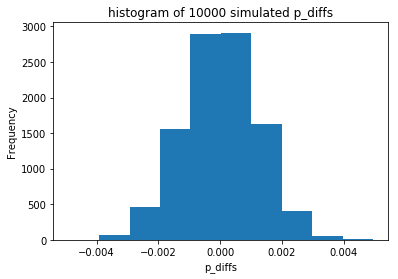

In [29]:
#plotting the bootstrap graph
plt.hist(p_diffs)
plt.xlabel('p_diffs')
plt.ylabel('Frequency')
plt.title('histogram of 10000 simulated p_diffs');

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

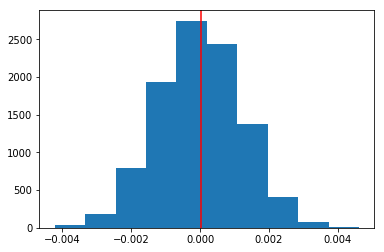

In [30]:
#crosschecking my result from above
p_diffs = np.array(p_diffs)
null_vals = np.random.normal(0, p_diffs.std(), p_diffs.size)
plt.hist(null_vals)
plt.axvline(x=p_dif, color='red')

In [34]:
# Find proportion of p_diffs greater than the actual difference
actual_diff = df[df['group'] == 'treatment']['converted'].mean() -  df[df['group'] == 'control']['converted'].mean()
p_diffs = np.array(p_diffs)
print(actual_diff)
(actual_diff < p_diffs).mean()

-0.00157823898536


0.90749999999999997

k. In words, explain what you just computed in part **j.**.  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

**Answer**
>1 i just computed the p-values here.

>2 the null hypothesis is true because the p value is <= 0.

l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [37]:
import statsmodels.api as sm

convert_old = df2.query('landing_page == "old_page" & converted == 1 ')['converted'].count()
convert_new = df2.query('landing_page == "new_page" & converted == 1 ')['converted'].count()
n_old = df2.query('landing_page == "old_page"')['landing_page'].count()
n_new = df2.query('landing_page == "new_page"')['landing_page'].count()

print("convert_old:", convert_old, 
      "\nconvert_new:", convert_new,
      "\nn_old:", n_old,
      "\nn_new:", n_new)

convert_old: 17489 
convert_new: 17264 
n_old: 145274 
n_new: 145310


m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](http://knowledgetack.com/python/statsmodels/proportions_ztest/) is a helpful link on using the built in.

In [1]:
import statsmodels.api as sm
z_score, p_value = sm.stats.proportions_ztest([17489, 17264], [145274, 145310], alternative = 'smaller')

print("z-score:", z_score,"\np-value:", p_value)


/opt/conda/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


z-score: 1.31092419842 
p-value: 0.905058312759


n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

**Answer**
> The z score is very low therefore we fail to reject the null hypothesis.

> The p score is almost identical with the one calculated above it is larger than 0.05 which means we have failed to reject the null hypothesis.

<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you acheived in the previous A/B test can also be acheived by performing regression.<br><br>

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

**Logistic Regression.**

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives.  However, you first need to create a colun for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [26]:
# we define our intercept and get dummies variables for the group column
df2['intercept'] = 1
df2[['control','treatment']] = pd.get_dummies(df['group'])

c. Use **statsmodels** to import your regression model.  Instantiate the model, and fit the model using the two columns you created in part **b.** to predict whether or not an individual converts.

In [28]:
#create a logistic regression model to fit
import statsmodels.api as sm
lm = sm.Logit(df2['converted'], df[['intercept','treatment']])
result = lm.fit()


Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [29]:
#print the model summary
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290582
Method:                           MLE   Df Model:                            1
Date:                Mon, 17 Dec 2018   Pseudo R-squ.:               8.077e-06
Time:                        15:48:58   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1899
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9888      0.008   -246.669      0.000      -2.005      -1.973
treatment     -0.0150      0.011     -1.311      0.190      -0.037       0.007
==============================================================================
"""

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in the **Part II**?<br><br>  **Hint**: What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in the **Part II**?

**Answer**
>The p value is not close to 0.000 we fail to reject the null value, the p value calculated above is very similar to our result here.

>part ii believe the old page is better than the new page, because we wanted to prove that H1 (alternative hypothesis) is true. Our p value is affected by the hypothesis because due to the sides in the distribution we are calculating our p value from. 

>The p-values using this math. (1 - (0.19/2) = 0.95). The reason lies in the fact that in part ii, we were concerned with which page had a higher conversion rate, so a one-tailed test. However, in part iii, the nature of a regression test is not concerned with which had a positive or negative change, specifically

f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

**Answer**
> It is a good idea add more factor to reduce monopoly therefore giving us more information on how other factors will affect the data and inprove our result and conclusion.

> Possible disadvantage

g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives. You will need to read in the **countries.csv** dataset and merge together your datasets on the approporiate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy varaibles.** Provide the statistical output as well as a written response to answer this question.

In [31]:
#reading the country dataframe
df_countries = pd.read_csv('countries.csv')
df_countries.head()

,user_id,country
0,834778,UK
1,928468,US
2,822059,UK
3,711597,UK
4,710616,UK


In [34]:
#join the country data frame with the original data frame
merged_df = pd.merge(df2, df_countries, on='user_id')
merged_df.head()

,user_id,timestamp,group,landing_page,converted,intercept,control,treatment,country
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,1,0,US
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,1,0,US
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,0,1,US
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,0,1,US
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,1,0,US


In [35]:
# get dummies variable for the country column
merged_df[['US','UK','CA']] = pd.get_dummies(merged_df['country'])[['US','UK','CA']]

In [36]:
#create a logitic regression model
merged_df['intercept'] = 1
lm = sm.Logit(merged_df['converted'], merged_df[['intercept','US', 'UK']])
result1 = lm.fit()
result1.summary()

Optimization terminated successfully.
         Current function value: 0.366116
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290581
Method:                           MLE   Df Model:                            2
Date:                Mon, 17 Dec 2018   Pseudo R-squ.:               1.521e-05
Time:                        16:12:56   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1984
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -2.0375      0.026    -78.364      0.000      -2.088      -1.987
US             0.0408      0.027      1.518      0.129      -0.012       0.093
UK             0.0507      0.028      1.786      0.074      -0.005       0.106
==============================================================================
"""

h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

In [41]:
merged_df.head()

,user_id,timestamp,group,landing_page,converted,intercept,control,treatment,country,US,UK,CA,old_page,new_page
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,1,0,US,1,0,0,1,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,1,0,US,1,0,0,1,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,0,1,US,1,0,0,0,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,0,1,US,1,0,0,0,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,1,0,US,1,0,0,1,0


In [43]:
# adding more data to the regression model
merged_df[['old_page', 'new_page']] = pd.get_dummies(merged_df['landing_page'])[['old_page', 'new_page']]
lm2 = sm.Logit(merged_df['converted'], merged_df[['intercept','US', 'UK', 'old_page']])
result2 = lm2.fit()
result2.summary()

Optimization terminated successfully.
         Current function value: 0.366113
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290580
Method:                           MLE   Df Model:                            3
Date:                Mon, 17 Dec 2018   Pseudo R-squ.:               2.323e-05
Time:                        16:22:19   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1760
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -2.0450      0.027    -76.820      0.000      -2.097      -1.993
US             0.0408      0.027      1.516      0.130      -0.012       0.093
UK             0.0506      0.028      1.784      0.074      -0.005       0.106
old_page       0.0149      0.011      1.307      0.191      -0.007       0.037
==============================================================================
"""

<a id='conclusions'></a>
## Finishing Up

> Congratulations!  You have reached the end of the A/B Test Results project!  This is the final project in Term 1.  You should be very proud of all you have accomplished!

> **Tip**: Once you are satisfied with your work here, check over your report to make sure that it is satisfies all the areas of the rubric (found on the project submission page at the end of the lesson). You should also probably remove all of the "Tips" like this one so that the presentation is as polished as possible.


## Directions to Submit

> Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [ ]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Analyze_ab_test_results_notebook.ipynb'])